In [1]:
import sys, os, importlib.util
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from scipy.constants import c
from scipy.interpolate import interp1d
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

In [2]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
from IPython.display import display, Math

In [3]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

fdtdApi = lumapi.FDTD(hide = False)

Units

In [4]:
um = 1e-6
nm = 1e-9
valor_lambda_1550 = 1550

Material and dimentions of the Waveguide

In [5]:
sub_material = 'SiO2 (Glass) - Palik'

gap = 200*nm

x_span_waveguide_acopla = 10.85*um
y_span_waveguide = 0.450*um
z_span_waveguide = 0.22*um
x_waveguide = 0.0*um
y_waveguide = ((gap+y_span_waveguide)/2)
z_waveguide = 0.0*um
waveguide_material = 'Si (Silicon) - Palik'
radiu = 5*um

Creat Waveguide

In [6]:
fdtdApi.switchtolayout()

fdtdApi.deleteall()

fdtdApi.addrect()
fdtdApi.set('name', 'waveguide_lower')
fdtdApi.set('material', waveguide_material)
fdtdApi.set('x', x_waveguide)
fdtdApi.set('y', -y_waveguide)
fdtdApi.set('z', z_waveguide)
fdtdApi.set('x span', x_span_waveguide_acopla)
fdtdApi.set('y span', y_span_waveguide)
fdtdApi.set('z span', z_span_waveguide)

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_upper')
fdtdApi.set('y', y_waveguide)
fdtdApi.set('x span', x_span_waveguide_acopla)

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_00')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', (2*radiu+y_waveguide))
fdtdApi.set('x span', x_span_waveguide_acopla/5)

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_01')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', (2*radiu+y_waveguide))

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_10')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', -(2*radiu+y_waveguide))

fdtdApi.copy()
fdtdApi.set('name', 'waveguide_11')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', -(2*radiu+y_waveguide))

fdtdApi.addobject('90_bend_wg')
fdtdApi.set('name', '90_bend_left_upper')
fdtdApi.set('material', waveguide_material)
fdtdApi.set('x', -(x_span_waveguide_acopla)/2)
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set('z', z_waveguide)
fdtdApi.set('radius', radiu)
fdtdApi.set('base width', y_span_waveguide)
fdtdApi.set('base height', z_span_waveguide)
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)
fdtdApi.set('second axis', 'x')
fdtdApi.set('rotation 1',180)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_rigth_upper')
fdtdApi.set('x', (x_span_waveguide_acopla)/2)
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', -90)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_rigth_lower')
fdtdApi.set('x', (x_span_waveguide_acopla)/2)
fdtdApi.set('y', -(radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 0)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_left_lower')
fdtdApi.set('x', -(x_span_waveguide_acopla)/2)
fdtdApi.set('y', -(radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_00')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu))
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 0)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_01')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu))
fdtdApi.set('y', (radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 90)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_10')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu))
fdtdApi.set('y', -(radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', -90)

fdtdApi.copy()
fdtdApi.set('name', '90_bend_11')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu))
fdtdApi.set('y', -(radiu+y_waveguide))
fdtdApi.set("first axis", 'z')
fdtdApi.set('rotation 1', 180)

Material and dimentions of the Solver FDTD an Port

In [7]:
fdtd_solver_material = sub_material

x_fdtd = 0.0*um
y_fdtd = 0.0*um
z_fdtd = 0.0*um
x_span_fdtd = 2*fdtdApi.getnamed('90_bend_01','x')  + 2*x_span_waveguide_acopla/5
y_span_fdtd = 2*(fdtdApi.getnamed('90_bend_01','y')+radiu) + 2*um
z_span_fdtd = 4*um

mesh_accuracy = 2

start_wavelength = 1500*nm
stop_wavelength = 1600*nm
num_frequency_points = 21

time_simulation = (2*np.pi*radiu + x_span_waveguide_acopla + 2*x_span_waveguide_acopla/5)*7/c + 200e-15


Creat Solver

In [8]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD')
fdtdApi.delete()

fdtdApi.addfdtd()
fdtdApi.set('background material', fdtd_solver_material)

fdtdApi.set('x', x_fdtd)
fdtdApi.set('y', y_fdtd)
fdtdApi.set('z', z_fdtd)
fdtdApi.set('x span', x_span_fdtd)
fdtdApi.set('y span', y_span_fdtd)
fdtdApi.set('z span', z_span_fdtd)

fdtdApi.set('mesh accuracy', mesh_accuracy)
fdtdApi.set('simulation time', time_simulation)

fdtdApi.set('x min bc', 'PML')
fdtdApi.set('x max bc', 'PML')
fdtdApi.set('y min bc', 'PML')
fdtdApi.set('y max bc', 'PML')
fdtdApi.set('z min bc', 'Symmetric')
fdtdApi.set('z max bc', 'PML')

fdtdApi.set('global source wavelength start', start_wavelength)
fdtdApi.set('global source wavelength stop', stop_wavelength)

In [9]:
fdtdApi.switchtolayout()

fdtdApi.select('FDTD::ports')
fdtdApi.delete()


fdtdApi.addport()
fdtdApi.set('name', 'port_00')
fdtdApi.set('injection axis', 'x-axis')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', (2*radiu+y_waveguide))
fdtdApi.set('y span', y_span_waveguide*2)
fdtdApi.set('z', z_fdtd)
fdtdApi.set('z span', z_span_waveguide*2)
fdtdApi.set('direction', 'Forward')
fdtdApi.set('mode selection', 'fundamental TE mode')

fdtdApi.copy()
fdtdApi.set('name', 'port_01')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('direction', 'Backward')

fdtdApi.copy()
fdtdApi.set('name', 'port_10')
fdtdApi.set('x', -((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('y', -(2*radiu+y_waveguide))
fdtdApi.set('direction', 'Forward')

fdtdApi.copy()
fdtdApi.set('name', 'port_11')
fdtdApi.set('x', ((x_span_waveguide_acopla)/2 + 2*radiu + x_span_waveguide_acopla/10))
fdtdApi.set('direction', 'Backward')

fdtdApi.select('FDTD::ports')
fdtdApi.set('monitor frequency points', num_frequency_points)

Monitores

In [10]:
fdtdApi.switchtolayout()

fdtdApi.select('Monitor_E')
fdtdApi.delete()

fdtdApi.addprofile()
fdtdApi.set('name', 'Monitor_E')
fdtdApi.set('override global monitor settings', True)
fdtdApi.set('frequency points', num_frequency_points)
fdtdApi.set('x', x_fdtd)
fdtdApi.set('y', y_fdtd)
fdtdApi.set('x span', x_span_fdtd)
fdtdApi.set('y span', y_span_fdtd)
fdtdApi.set('z', z_fdtd)

Find Modes

In [11]:
filename = 'Acoplador Direcional'
fdtdApi.save(filename)

In [180]:
fdtdApi.run(3)

Perfil de Campo Elétrico

In [181]:
E = fdtdApi.getresult('Monitor_E', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)
Emag_log = 10*np.log10((Emag[:,:,0]))

C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1515: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1516: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\contour.py:1181: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg, np.float64)
C:\Users\edilb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\ma\cor

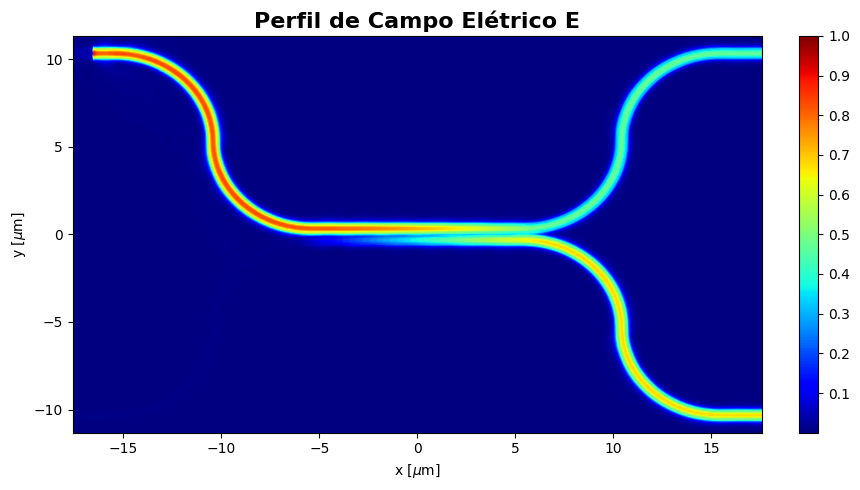

In [182]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(Emag.min(),1.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(0,1,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Eletrico Linear.png')
plt.show()

Plot do gráfico

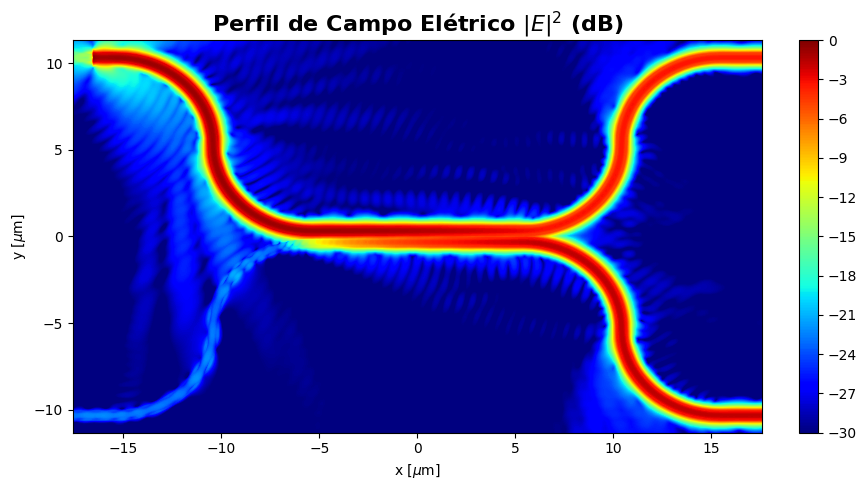

In [183]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(-30,0.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag_log), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(-30,0,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico - Log.png')
plt.show()



Transmissão nas portas

In [184]:
trans_00 = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01 = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10 = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11 = fdtdApi.getresult('FDTD::ports::port_11', 'T')


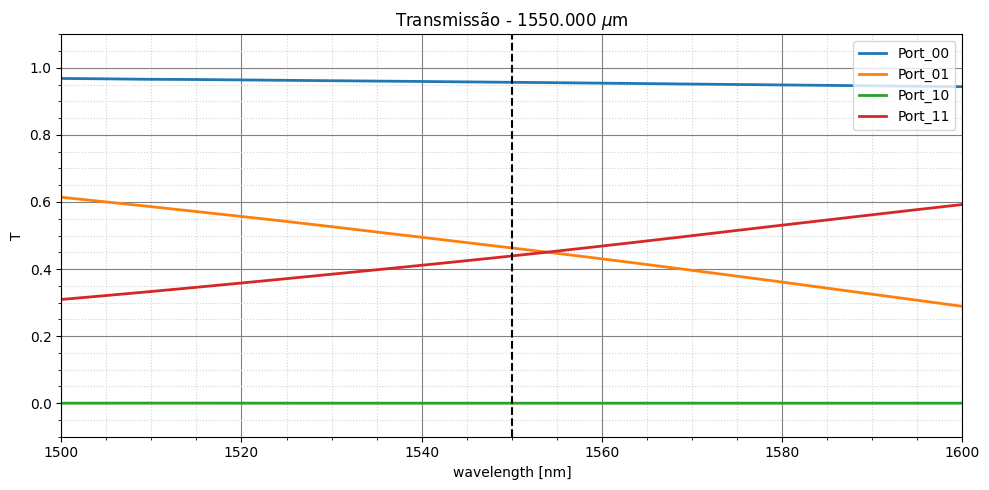

In [185]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)
plt.plot(trans_00['lambda']/nm, np.abs(trans_00['T']), label = 'Port_00', linewidth=2)
plt.plot(trans_01['lambda']/nm, np.abs(trans_01['T']), label = 'Port_01', linewidth=2)
plt.plot(trans_10['lambda']/nm, np.abs(trans_10['T']), label = 'Port_10', linewidth=2)
plt.plot(trans_11['lambda']/nm, np.abs(trans_11['T']), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-0.1,1.1])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda_1550)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Linear.png')
plt.show()

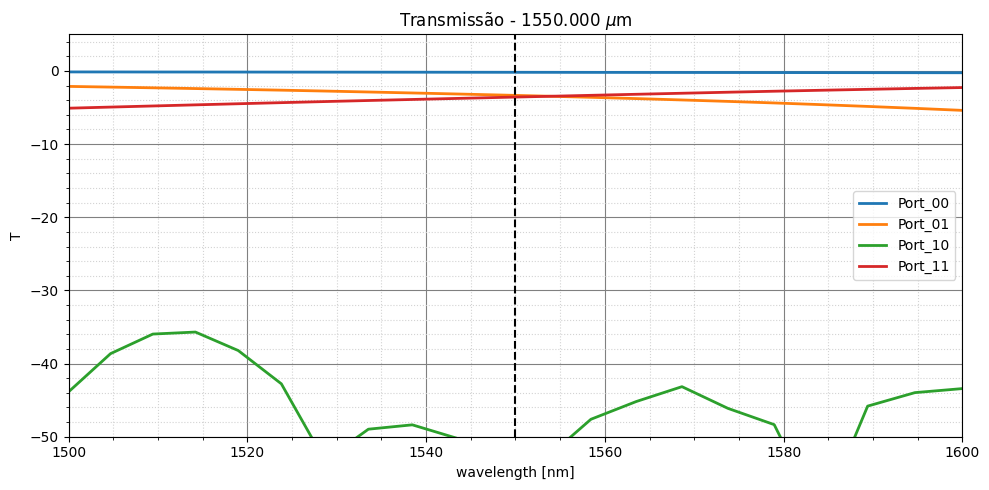

In [186]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)
plt.plot(trans_00['lambda']/nm, 10*np.log10(np.abs(trans_00['T'])), label = 'Port_00', linewidth=2)
plt.plot(trans_01['lambda']/nm, 10*np.log10(np.abs(trans_01['T'])), label = 'Port_01', linewidth=2)
plt.plot(trans_10['lambda']/nm, 10*np.log10(np.abs(trans_10['T'])), label = 'Port_10', linewidth=2)
plt.plot(trans_11['lambda']/nm, 10*np.log10(np.abs(trans_11['T'])), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-50,5])
plt.title(r'Transmissão - %4.3f $\mu$m'%valor_lambda_1550)
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas - Log.png')
plt.show()

In [187]:
x_value = 1550


transmition_00 = interp1d(np.ravel(trans_00['lambda'])/nm, np.abs(trans_00['T']), kind='linear', fill_value='extrapolate')
transmition_01 = interp1d(np.ravel(trans_01['lambda'])/nm, np.abs(trans_01['T']), kind='linear', fill_value='extrapolate')
transmition_10 = interp1d(np.ravel(trans_10['lambda'])/nm, np.abs(trans_10['T']), kind='linear', fill_value='extrapolate')
transmition_11 = interp1d(np.ravel(trans_11['lambda'])/nm, np.abs(trans_11['T']), kind='linear', fill_value='extrapolate')

T_00 = transmition_00(x_value)
T_01 = transmition_01(x_value)
T_10 = transmition_10(x_value)
T_11 = transmition_11(x_value)

print(f'Transmissão na Port 00 para {x_value}nm: {T_00:.4f}')
print(f'Transmissão na Port 01 para {x_value}nm: {T_01:.4f}')
print(f'Transmissão na Port 10 para {x_value}nm: {T_10:.4f}')
print(f'Transmissão na Port 11 para {x_value}nm: {T_11:.4f}')

Transmissão na Port 00 para 1550nm: 0.9570
Transmissão na Port 01 para 1550nm: 0.4630
Transmissão na Port 10 para 1550nm: 0.0000
Transmissão na Port 11 para 1550nm: 0.4391


Perda de Inserção

In [188]:
P_out = 10*np.log10(T_01 + T_11)

Perda = P_out

print(f'Perda de Inserção para {x_value}nm = {Perda:.4f}dB')

Perda de Inserção para 1550nm = -0.4477dB


In [346]:
x_span_waveguide_acopla_start = 10*um
x_span_waveguide_acopla_stop = 13*um
number_points_span = 7
num_frequency_points = 11
x_span_waveguide_acopla_vector = np.linspace(x_span_waveguide_acopla_start, x_span_waveguide_acopla_stop, number_points_span)

trans_00_vector = np.zeros([number_points_span, num_frequency_points])
trans_01_vector = np.zeros([number_points_span, num_frequency_points])
trans_10_vector = np.zeros([number_points_span, num_frequency_points])
trans_11_vector = np.zeros([number_points_span, num_frequency_points])

In [347]:
fdtdApi.switchtolayout()

fdtdApi.setnamed('FDTD', 'global source wavelength start', 1530*nm)
fdtdApi.setnamed('FDTD', 'global source wavelength stop', 1575*nm)
fdtdApi.setnamed('FDTD::ports', 'monitor frequency points', num_frequency_points)
fdtdApi.setnamed('Monitor_E','frequency points', num_frequency_points)

for i in range(number_points_span):
    fdtdApi.switchtolayout()
    
    x_span_waveguide_acopla_aux = x_span_waveguide_acopla_vector[i]
    
    fdtdApi.setnamed('waveguide_lower', 'x span', x_span_waveguide_acopla_aux)
    fdtdApi.setnamed('waveguide_upper', 'x span', x_span_waveguide_acopla_aux)
    fdtdApi.setnamed('90_bend_left_upper','x', -(x_span_waveguide_acopla_aux)/2)
    fdtdApi.setnamed('90_bend_rigth_upper','x', (x_span_waveguide_acopla_aux)/2)
    fdtdApi.setnamed('90_bend_rigth_lower','x', (x_span_waveguide_acopla_aux)/2)
    fdtdApi.setnamed('90_bend_left_lower','x', -(x_span_waveguide_acopla_aux)/2)
    fdtdApi.setnamed('90_bend_00','x', -((x_span_waveguide_acopla_aux)/2 + 2*radiu))
    fdtdApi.setnamed('90_bend_01','x', ((x_span_waveguide_acopla_aux)/2 + 2*radiu))
    fdtdApi.setnamed('90_bend_10','x', -((x_span_waveguide_acopla_aux)/2 + 2*radiu))
    fdtdApi.setnamed('90_bend_11','x', ((x_span_waveguide_acopla_aux)/2 + 2*radiu))
    fdtdApi.setnamed('waveguide_00','x', fdtdApi.getnamed('90_bend_00', 'x') - fdtdApi.getnamed('waveguide_00', 'x span')/2)
    fdtdApi.setnamed('waveguide_01','x', fdtdApi.getnamed('90_bend_01', 'x') + fdtdApi.getnamed('waveguide_01', 'x span')/2)
    fdtdApi.setnamed('waveguide_10','x', fdtdApi.getnamed('90_bend_10', 'x') - fdtdApi.getnamed('waveguide_10', 'x span')/2)
    fdtdApi.setnamed('waveguide_11','x', fdtdApi.getnamed('90_bend_11', 'x') + fdtdApi.getnamed('waveguide_11', 'x span')/2)

    x_span_fdtd_aux = 2*fdtdApi.getnamed('waveguide_01', 'x') + fdtdApi.getnamed('waveguide_01', 'x span')/2
    time_simulation = (2*np.pi*radiu + x_span_waveguide_acopla_aux + 2*x_span_waveguide_acopla_aux/5)*7/c + 200e-15

    fdtdApi.setnamed('FDTD', 'x span', x_span_fdtd_aux)
    fdtdApi.setnamed('FDTD', 'simulation time', time_simulation)
    
    fdtdApi.setnamed('FDTD::ports::port_00', 'x',  fdtdApi.getnamed('waveguide_00', 'x'))
    fdtdApi.setnamed('FDTD::ports::port_01', 'x',  fdtdApi.getnamed('waveguide_01', 'x'))
    fdtdApi.setnamed('FDTD::ports::port_10', 'x',  fdtdApi.getnamed('waveguide_10', 'x'))
    fdtdApi.setnamed('FDTD::ports::port_11', 'x',  fdtdApi.getnamed('waveguide_11', 'x'))

    fdtdApi.setnamed('Monitor_E', 'x span', x_span_fdtd_aux)

    fdtdApi.run(3)
    
    trans_00_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_00', 'T')['T']
    trans_01_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_01', 'T')['T']
    trans_10_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_10', 'T')['T']
    trans_11_vector[i,:] = fdtdApi.getresult('FDTD::ports::port_11', 'T')['T']

C:\Users\edilb\AppData\Local\Temp\ipykernel_20204\346031520.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax5.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_01_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)
C:\Users\edilb\AppData\Local\Temp\ipykernel_20204\346031520.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax5.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_11_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)


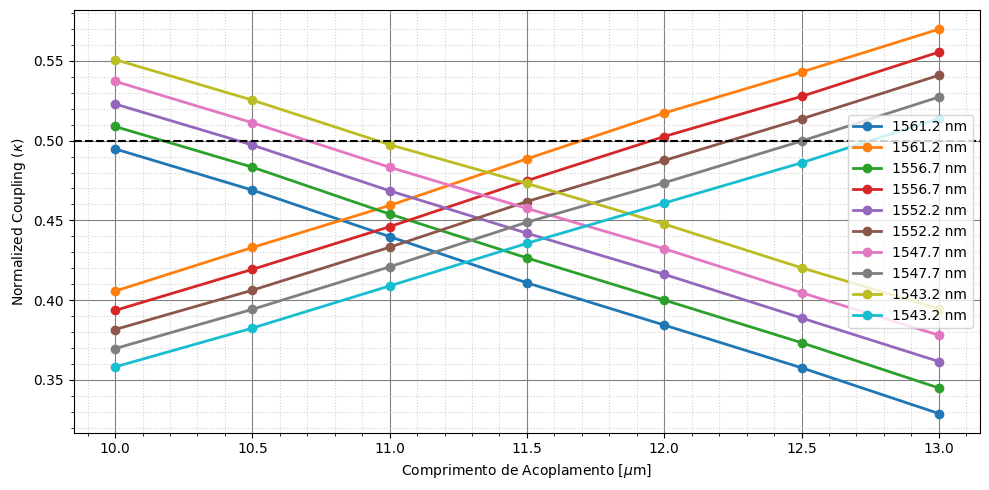

In [348]:
lambda_valors = fdtdApi.getresult('FDTD::ports::port_00', 'T')['lambda']

fig5 = plt.figure(figsize=(10,5))
ax5 = fig5.add_subplot(111)
for j in range(3,8):    
    ax5.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_01_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)
    ax5.plot(x_span_waveguide_acopla_vector/um, np.abs(trans_11_vector[:,j]), 'o-', label= '%5.1f nm'% (lambda_valors[j]/nm), linewidth=2)

plt.axhline(y=0.5, color='k', linestyle='--')

plt.xlabel(r'Comprimento de Acoplamento [$\mu$m]')
plt.ylabel(r'Normalized Coupling ($\kappa$)')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Comprimentos de Acoplamento para Otimização.png')
plt.show()

In [12]:
fdtdApi.switchtolayout()
    
num_frequency_points = 21
x_span_waveguide_acopla_otimizado = 11.05*um

fdtdApi.setnamed('FDTD', 'global source wavelength start', 1500*nm)
fdtdApi.setnamed('FDTD', 'global source wavelength stop', 1600*nm)
fdtdApi.setnamed('FDTD::ports', 'monitor frequency points', num_frequency_points)
fdtdApi.setnamed('Monitor_E','frequency points', num_frequency_points)
    
fdtdApi.setnamed('waveguide_lower', 'x span', x_span_waveguide_acopla_otimizado)
fdtdApi.setnamed('waveguide_upper', 'x span', x_span_waveguide_acopla_otimizado)
fdtdApi.setnamed('90_bend_left_upper','x', -(x_span_waveguide_acopla_otimizado)/2)
fdtdApi.setnamed('90_bend_rigth_upper','x', (x_span_waveguide_acopla_otimizado)/2)
fdtdApi.setnamed('90_bend_rigth_lower','x', (x_span_waveguide_acopla_otimizado)/2)
fdtdApi.setnamed('90_bend_left_lower','x', -(x_span_waveguide_acopla_otimizado)/2)
fdtdApi.setnamed('90_bend_00','x', -((x_span_waveguide_acopla_otimizado)/2 + 2*radiu))
fdtdApi.setnamed('90_bend_01','x', ((x_span_waveguide_acopla_otimizado)/2 + 2*radiu))
fdtdApi.setnamed('90_bend_10','x', -((x_span_waveguide_acopla_otimizado)/2 + 2*radiu))
fdtdApi.setnamed('90_bend_11','x', ((x_span_waveguide_acopla_otimizado)/2 + 2*radiu))
fdtdApi.setnamed('waveguide_00','x', fdtdApi.getnamed('90_bend_00', 'x') - fdtdApi.getnamed('waveguide_00', 'x span')/2)
fdtdApi.setnamed('waveguide_01','x', fdtdApi.getnamed('90_bend_01', 'x') + fdtdApi.getnamed('waveguide_01', 'x span')/2)
fdtdApi.setnamed('waveguide_10','x', fdtdApi.getnamed('90_bend_10', 'x') - fdtdApi.getnamed('waveguide_10', 'x span')/2)
fdtdApi.setnamed('waveguide_11','x', fdtdApi.getnamed('90_bend_11', 'x') + fdtdApi.getnamed('waveguide_11', 'x span')/2)

x_span_fdtd_otimizado = 2*fdtdApi.getnamed('waveguide_01', 'x') + fdtdApi.getnamed('waveguide_01', 'x span')/2
time_simulation = (2*np.pi*radiu + x_span_waveguide_acopla_otimizado + 2*x_span_waveguide_acopla_otimizado/5)*7/c + 200e-15

fdtdApi.setnamed('FDTD', 'x span', x_span_fdtd_otimizado)
fdtdApi.setnamed('FDTD', 'simulation time', time_simulation)
    
fdtdApi.setnamed('FDTD::ports::port_00', 'x',  fdtdApi.getnamed('waveguide_00', 'x'))
fdtdApi.setnamed('FDTD::ports::port_01', 'x',  fdtdApi.getnamed('waveguide_01', 'x'))
fdtdApi.setnamed('FDTD::ports::port_10', 'x',  fdtdApi.getnamed('waveguide_10', 'x'))
fdtdApi.setnamed('FDTD::ports::port_11', 'x',  fdtdApi.getnamed('waveguide_11', 'x'))

fdtdApi.setnamed('Monitor_E', 'x span', x_span_fdtd_otimizado)

In [ ]:
fdtdApi.run(3)
    
trans_00_otimizado = fdtdApi.getresult('FDTD::ports::port_00', 'T')
trans_01_otimizado = fdtdApi.getresult('FDTD::ports::port_01', 'T')
trans_10_otimizado = fdtdApi.getresult('FDTD::ports::port_10', 'T')
trans_11_otimizado = fdtdApi.getresult('FDTD::ports::port_11', 'T')

In [ ]:
E = fdtdApi.getresult('Monitor_E', 'E')

x = E['x']
x = x[:,0]/um

y = E['y']
y = y[:,0]/um

z = E['z']
E = E['E']

Ex = E[:,:,0,:,0]
Ey = E[:,:,0,:,1]
Ez = E[:,:,0,:,2]

Emag = np.sqrt(np.abs(Ex)**2 + np.abs(Ey)**2 + Ez**2)
Emag_log = 10*np.log10((Emag[:,:,0]))

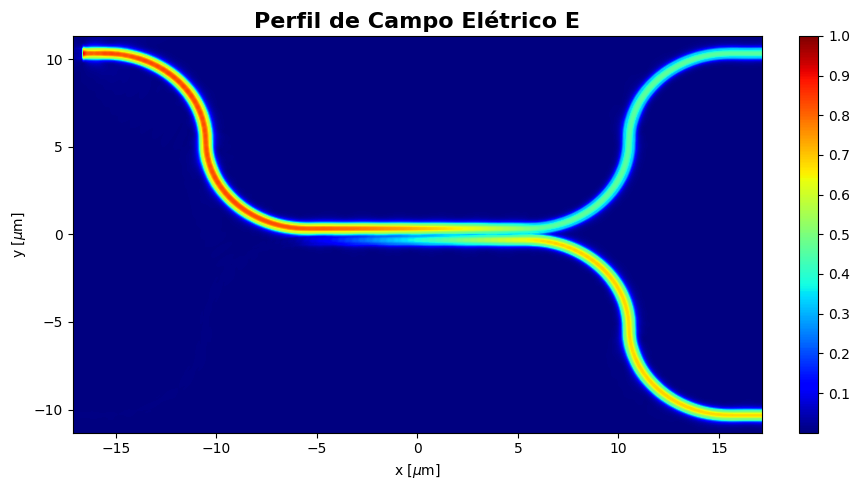

In [ ]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(Emag.min(),1.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag[:,:,0]), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(0,1,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title('Perfil de Campo Elétrico E', fontsize = 16, fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Eletrico Linear - Otimizado.png')
plt.show()

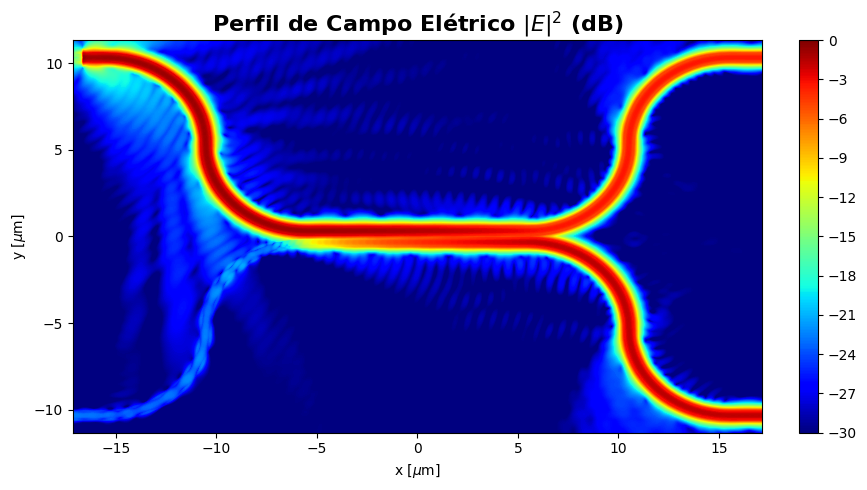

In [ ]:
plt.figure(figsize=(10, 5))
mycmap = plt.get_cmap('jet')

v = np.linspace(-30,0.00001,250,endpoint=True)

plt.contourf(x,y,np.clip(np.transpose(Emag_log), v.min(), v.max()),v,cmap = mycmap)
plt.colorbar(ticks=np.linspace(-30,0,11, endpoint=True), fraction=0.2, pad=0.04)

plt.title(r'Perfil de Campo Elétrico $|E|^2$ (dB)', fontsize = 16,  fontweight = 'bold',)
plt.ylabel(r'y [$\mu$m]')
plt.xlabel(r'x [$\mu$m]')

plt.tight_layout()
plt.savefig('Perfil de Campo Elétrico Log - Otimizado.png')
plt.show()

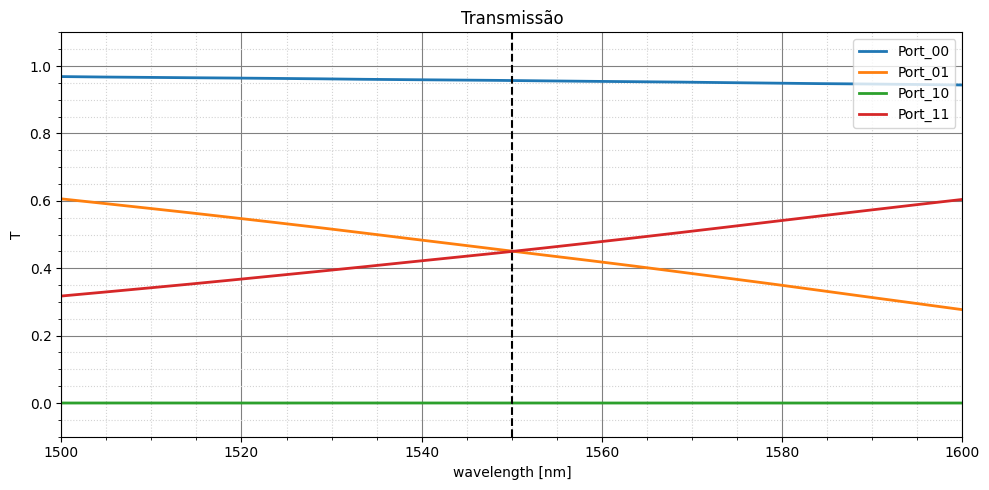

In [ ]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(111)
plt.plot(trans_00_otimizado['lambda']/nm, np.abs(trans_00_otimizado['T']), label = 'Port_00', linewidth=2)
plt.plot(trans_01_otimizado['lambda']/nm, np.abs(trans_01_otimizado['T']), label = 'Port_01', linewidth=2)
plt.plot(trans_10_otimizado['lambda']/nm, np.abs(trans_10_otimizado['T']), label = 'Port_10', linewidth=2)
plt.plot(trans_11_otimizado['lambda']/nm, np.abs(trans_11_otimizado['T']), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-0.1,1.1])
plt.title(r'Transmissão')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas otimizadas - Linear.png')
plt.show()

C:\Users\edilb\AppData\Local\Temp\ipykernel_20204\3240246997.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


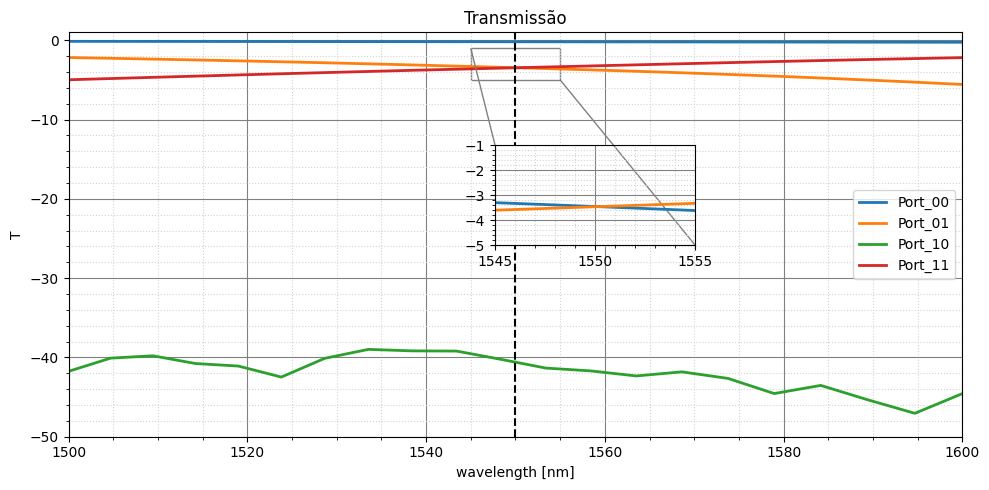

In [ ]:
fig6 = plt.figure(figsize=(10,5))
ax6 = fig6.add_subplot(111)
plt.plot(trans_00_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_00_otimizado['T'])), label = 'Port_00', linewidth=2)
plt.plot(trans_01_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_01_otimizado['T'])), label = 'Port_01', linewidth=2)
plt.plot(trans_10_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_10_otimizado['T'])), label = 'Port_10', linewidth=2)
plt.plot(trans_11_otimizado['lambda']/nm, 10*np.log10(np.abs(trans_11_otimizado['T'])), label = 'Port_11', linewidth=2)

plt.axvline(x=valor_lambda_1550, color='k', linestyle='--')

plt.xlabel('wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelength/nm, stop_wavelength/nm])
plt.ylim([-50,1])
plt.title('Transmissão')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.minorticks_on()

plt.tight_layout()
plt.savefig('Transmissão nas portas otimizadas - Log.png')
plt.show()